# Baseball Case Study

In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading Dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


-- Input features-
1.	W - This indicates the number of Wins credited to a pitcher: 
2.	R - This indicates Runs scored. 
3.	AB - This means At bat or time at bat. 
4.	H - This means Hit. It's also called a "base hit".
5.	2B - It is called a "two-bagger" or "two-base hit"
6.	3B - This means a Triple. A triple is sometimes called a "three-bagger" or "three-base hit"
7.	HR - This means Home runs. 
8.	BB - This means Base on balls (also called a "walk"). 
9.	SO - Also denoted as "K" means Strikeout. 
10.	SB - This means Stolen base. 
11.	RA - This means Run Average. 
12.	ER - This means Earned run. 
13.	ERA - This means Earned Run Average. 
14.	CG - This means Complete Game. 
15.	SHO - This means Shutout. 
16.	SV - This means Save. 
17.	E - This means Errors. 

-- Output: Number of predicted wins (W)


In [3]:
df.keys()

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
df.head(1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88


In [5]:
df.tail(1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
df.sample()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
23,67,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90


In [7]:
# checking shape
df.shape

(30, 17)

In [8]:
#checking datatype
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

all variables are of integer type except ERA is in float type.

In [9]:
#checking for unique values
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [10]:
#checking for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

no null values is present

<Axes: >

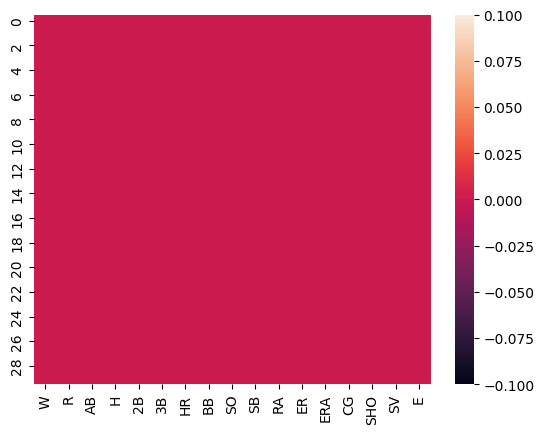

In [11]:
#heatmap for null values
sns.heatmap(df.isnull())

from heatmap it shows that no null value is present

In [12]:
# checking for white space
# Iterate through each column of the dataframe and check for white spaces
for col in df.columns:
    # Count the number of white spaces in the column
    num_spaces = sum(df[col].astype(str).apply(lambda x: x.isspace()))

    # Display the results
    print(f"Column '{col}' has {num_spaces} white spaces.")

Column 'W' has 0 white spaces.
Column 'R' has 0 white spaces.
Column 'AB' has 0 white spaces.
Column 'H' has 0 white spaces.
Column '2B' has 0 white spaces.
Column '3B' has 0 white spaces.
Column 'HR' has 0 white spaces.
Column 'BB' has 0 white spaces.
Column 'SO' has 0 white spaces.
Column 'SB' has 0 white spaces.
Column 'RA' has 0 white spaces.
Column 'ER' has 0 white spaces.
Column 'ERA' has 0 white spaces.
Column 'CG' has 0 white spaces.
Column 'SHO' has 0 white spaces.
Column 'SV' has 0 white spaces.
Column 'E' has 0 white spaces.


In [13]:
white space is not present in any column

SyntaxError: invalid syntax (1257015671.py, line 1)

# Visualization of data

### Univariant analysis


In [ ]:
plt.figure(figsize=(20,18))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5,4,i)
    sns.distplot(df[column])

Observation-
Left Skewed- SO is left skewed data.

Right Skewed- H, HR, CG, E are right skewed data.

Normal distribution-AB, W, R, 2B, 3B, BB, SB, RA, ER, ERA, SHO, SV are normally distributed data

### bivarient visualization

In [ ]:
# Choose the columns to compare
cols_to_compare = ['R', 'AB', 'H', '2B', '3B', 'HR']

# Choose the target column to use for color
target_col = 'W'

# Create a pairplot with target column as color
sns.pairplot(data=df, vars=cols_to_compare, hue=target_col)

In [ ]:
# Choose the columns to compare
cols_to_compare = ['BB', 'SO', 'SB', 'RA', 'ER']

# Choose the target column to use for color
target_col = 'W'

# Create a pairplot with target column as color
sns.pairplot(data=df, vars=cols_to_compare, hue=target_col)

In [ ]:
# Choose the columns to compare
cols_to_compare = ['ERA', 'CG', 'SHO', 'SV', 'E']

# Choose the target column to use for color
target_col = 'W'

# Create a pairplot with target column as color
sns.pairplot(data=df, vars=cols_to_compare, hue=target_col)

# Statistic Summary

In [ ]:
df.describe()

Observation:
1. Count value is same for all columns i.e. no null value is present.
2. Left Skewed data- if mean<median then it is left skewed and from above observation SO have highly skewed left and BB, RA,ER,ERA have lightly left skewed.
3. Right Skewed data- if mean>median then it is right skewed and from above observation AB,H,HR,CG,E are right skewed data.
4. Normally distributed data - if mean= median then data is normally distributed and here we observe that W,R,2B,3B,SB,CG,SHO,SV are normally distributed.
5. R, AB,H,2B,HR,BB,SO,SB,RA,ER,SV,E column have a huge difference between 75% and max value, so there is possiblity to have outliers



<Axes: >

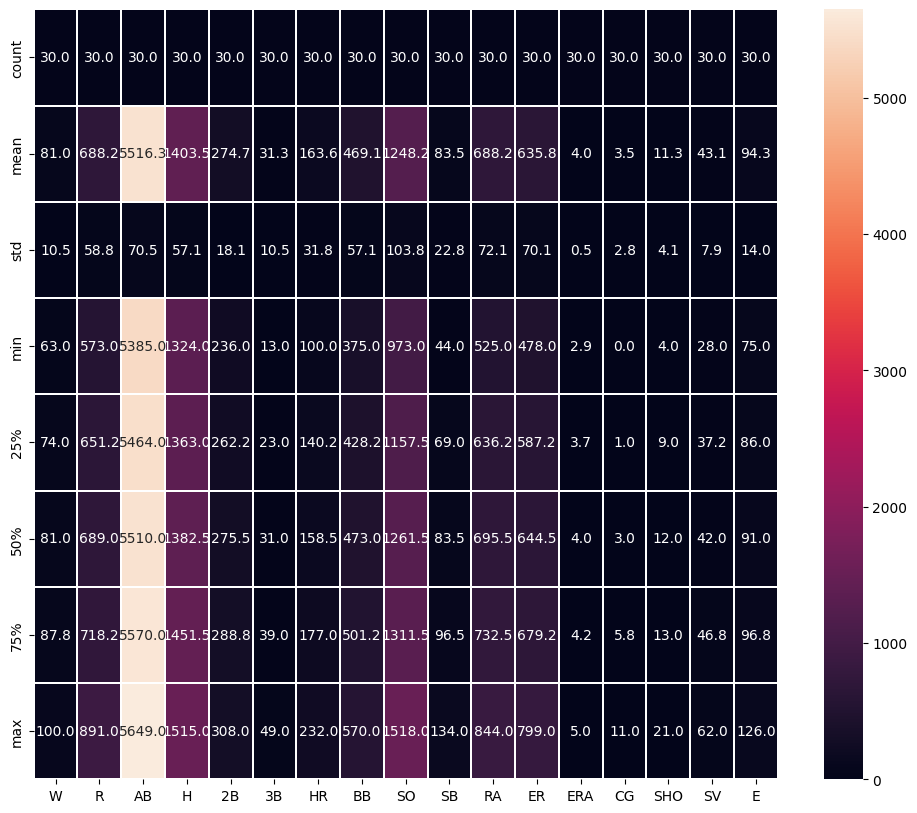

In [14]:
#visualize df.describe
plt.figure(figsize=(12,10))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)

In [15]:
# correlation of column with target column
df.corr()["W"].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

<Axes: >

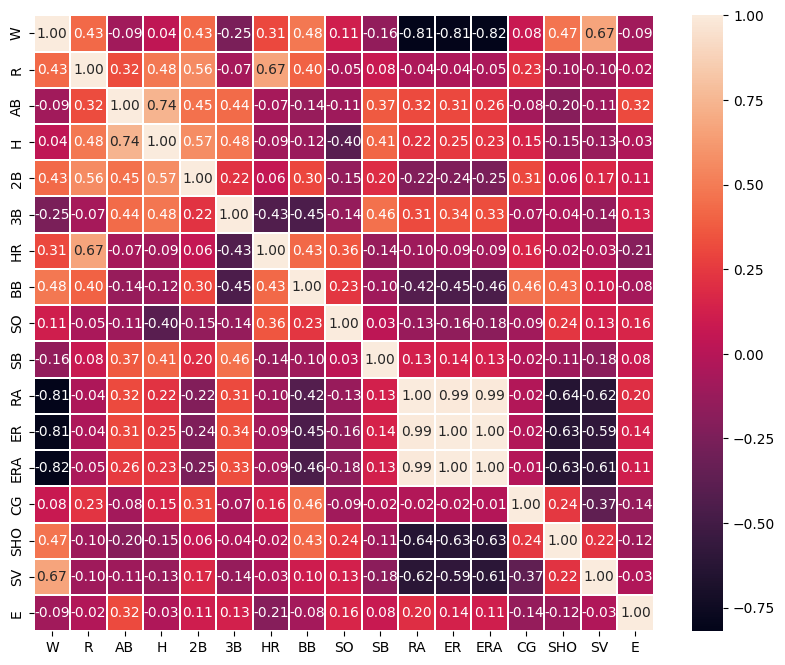

In [16]:
# visualize the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.2f',annot=True)

Observation:

    1. Independent with W(target variable):-  H and CG 
    2. Negative correlation with W(target variable):-
       Strongest negative correlation:- RA, ER and ERA
       Strong negative correlation:- 3B
       Least negative correlation:- AB, SB, E
    3. Positive correlation with W(target variable):-
       Strongest positive correlation:- SV
       Strong positive correlation:- SHO, BB,HR,2B,R
       Least positive correlation:- SO
    4. There is strong positive correlation between RA, ERA,ER
    5. There is correlation between HR and R, H and AB, W and SV
    6. There is strong negative correlation between RA, ER, ERA with SV,SHO
    7. We find multicollinarity in some column.

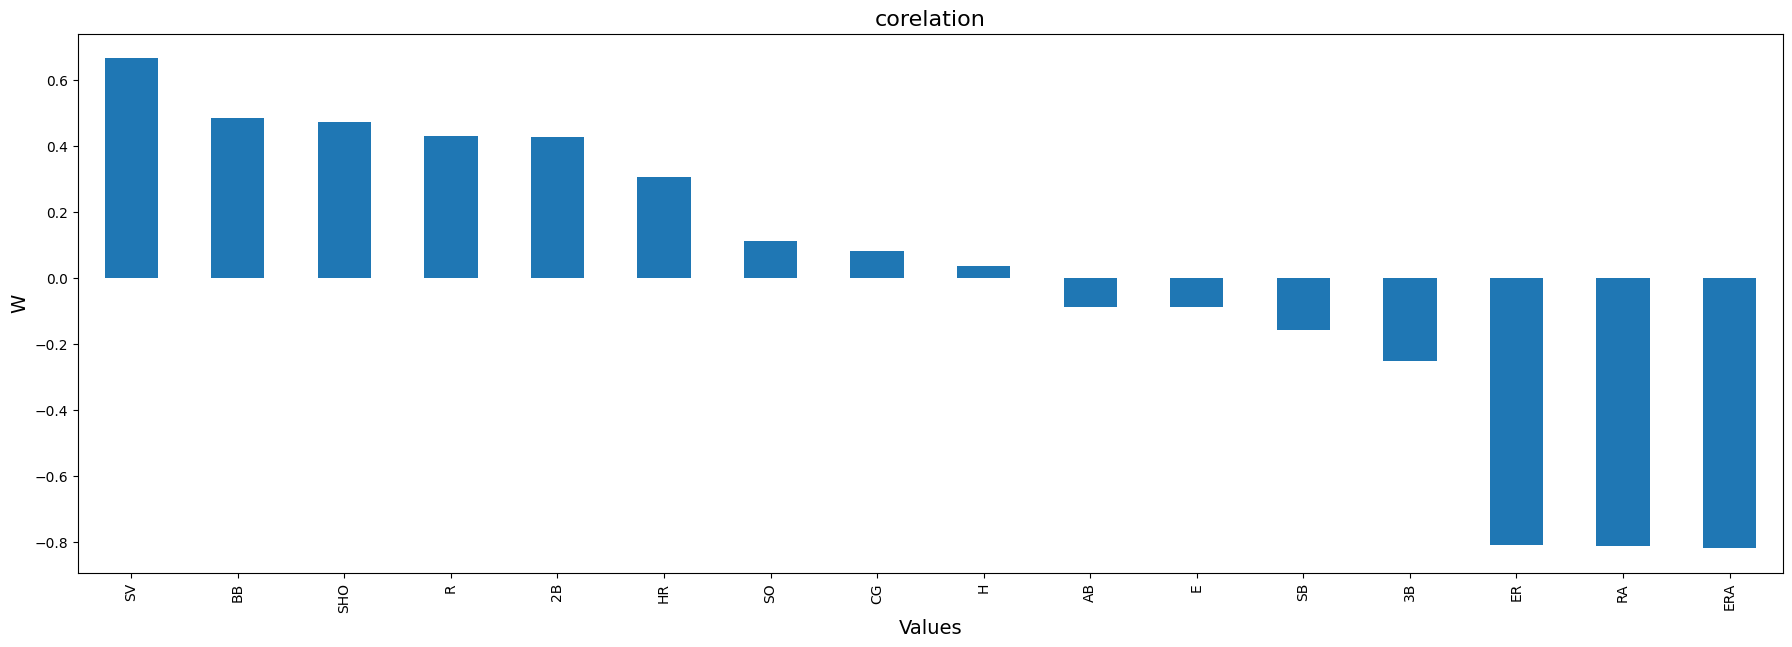

In [17]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar')
plt.xlabel('Values',fontsize=14)
plt.ylabel('W',fontsize=14)
plt.title('corelation',fontsize=16)
plt.show()

Observation:
1. positive corelation with W (according to descending order): SV, BB, SHO, R, 2B, HR,SO, CG, H
2. Negative corelation with W (according to descending order): AB, E, SB,3B, ER, RA,ERA

In [18]:
# skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Observation:
Column R, H,CG, SHO, SV, E have skewness

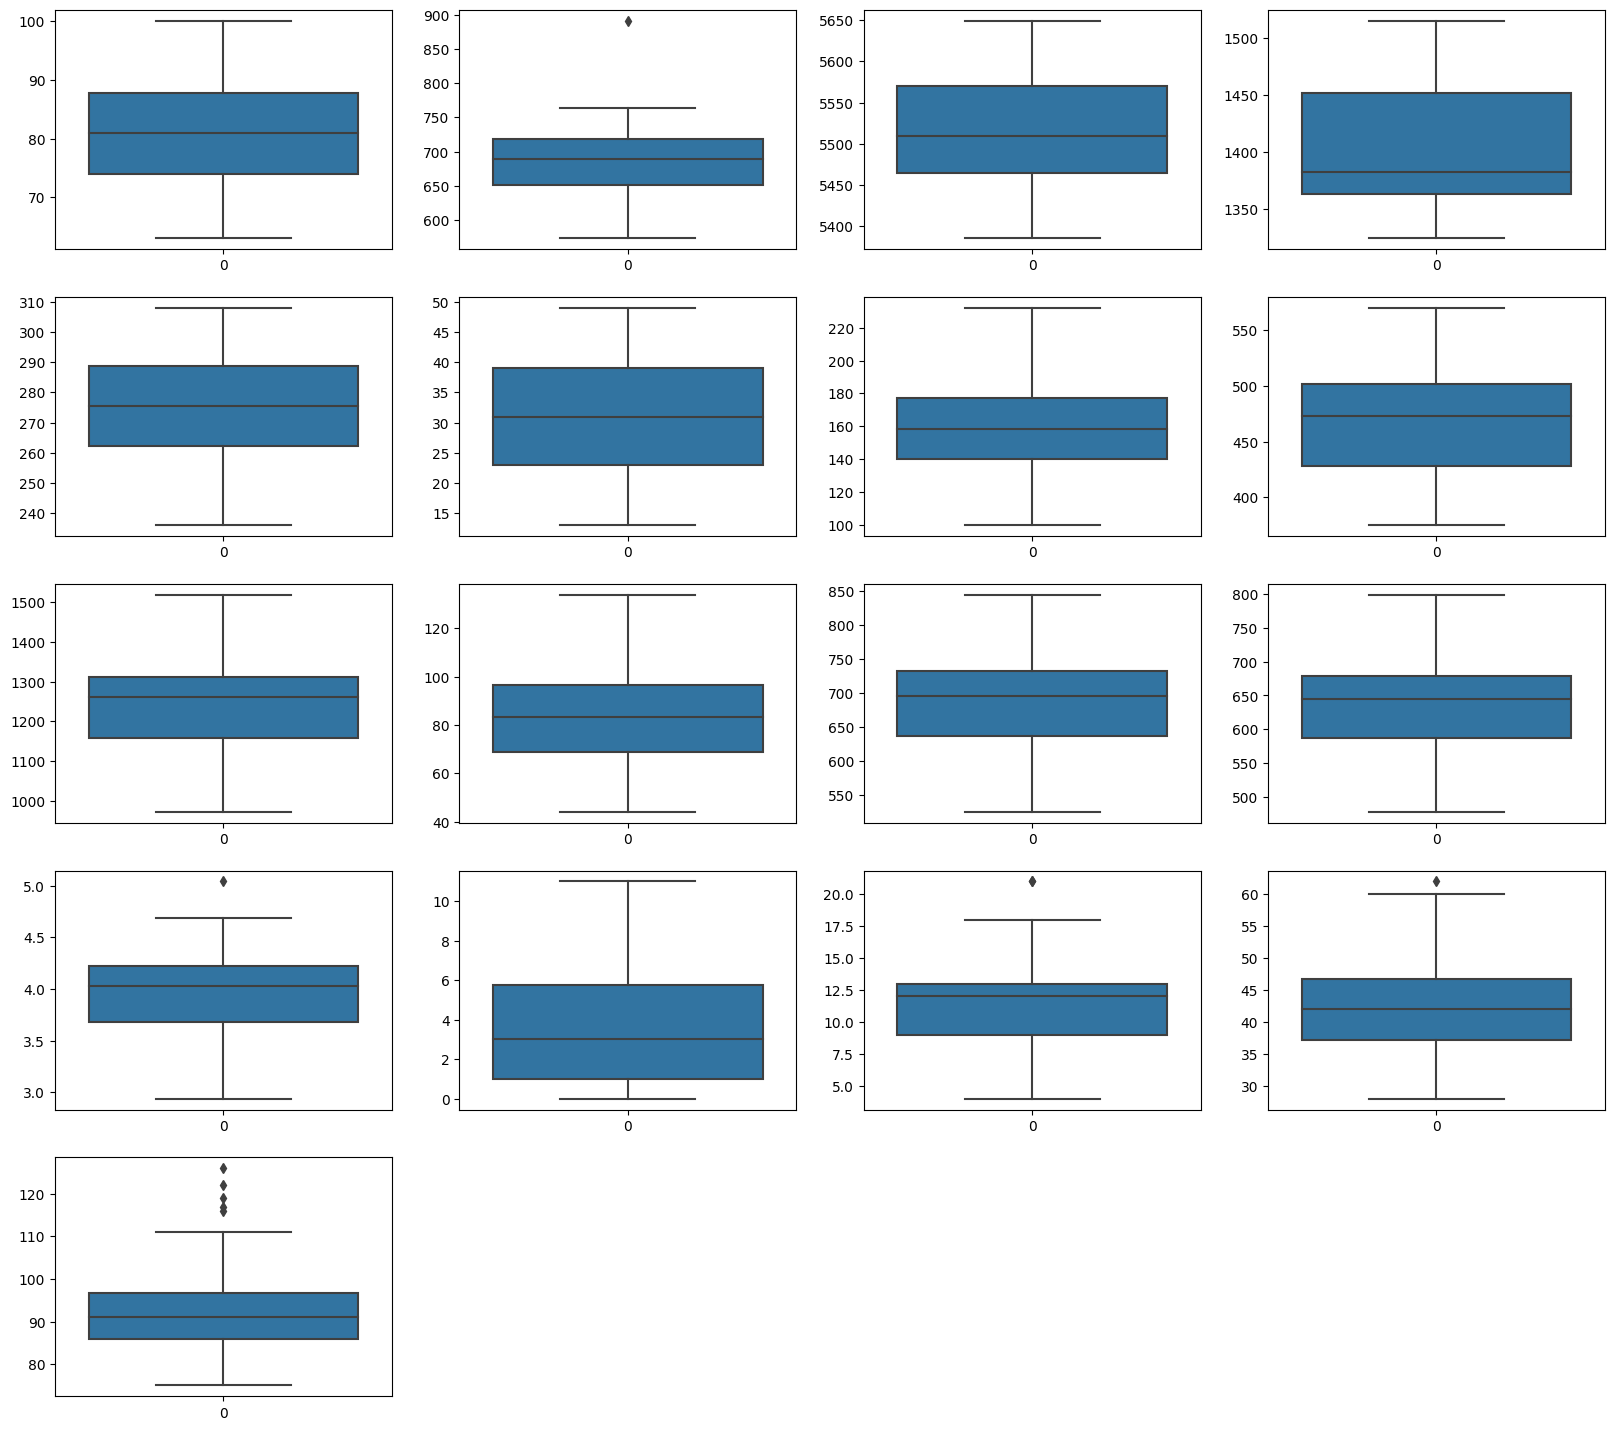

In [19]:
# checking for outliers
plt.figure(figsize=(20,18))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5,4,i)
    sns.boxplot(df[column])

Observation: Outliers are present in E, SV, SHO, ERA, R columns

In [20]:
# Outlier removing
df.shape

(30, 17)

In [21]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [22]:
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [23]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [24]:
df_new.shape

(29, 17)

In [25]:
#data loss in percentage
Data_loss =((df.shape[0]-df_new.shape[0])/df.shape[0])*100
Data_loss


3.3333333333333335

Observation:
    Our acceptable Data loss in percentage is 10%. Here we get data loss as 3.33% , so we can go with this new dataset

In [26]:
#checking skewness for new dataset
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Observation: 
1) Skewness is present in following columns
    1. H
    2. CG
    3. SHO
    4. SV
    5. E
    
 2) We also found that from correlation observation H and CG are independent with targeted variable(W). so we consider only 3 column for skewness removal  

In [27]:
# skewness removal using power transform
skewed_features = ["SHO", "SV", "E"]


In [28]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_new[skewed_features] = pt.fit_transform(df_new[skewed_features].values)
df_new[skewed_features]

,SHO,SV,E
0,-0.787002,1.532753,-0.348265
1,0.236737,0.312020,-0.540820
2,-0.252844,-0.664137,-1.326125
3,-0.513555,-0.820689,0.650818
4,0.236737,-1.149165,-0.540820
6,-2.064039,0.677176,0.082858
7,-0.252844,0.052325,-1.588197
8,0.236737,1.908137,0.237592
9,-0.252844,-0.365006,0.383386
10,-0.513555,0.312020,1.554265


In [29]:
# checking for skweness again
df_new[skewed_features].skew()

SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Observation:
    we fown that skewness was removed

In [30]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

In [31]:
# rename dataset
df=df_new

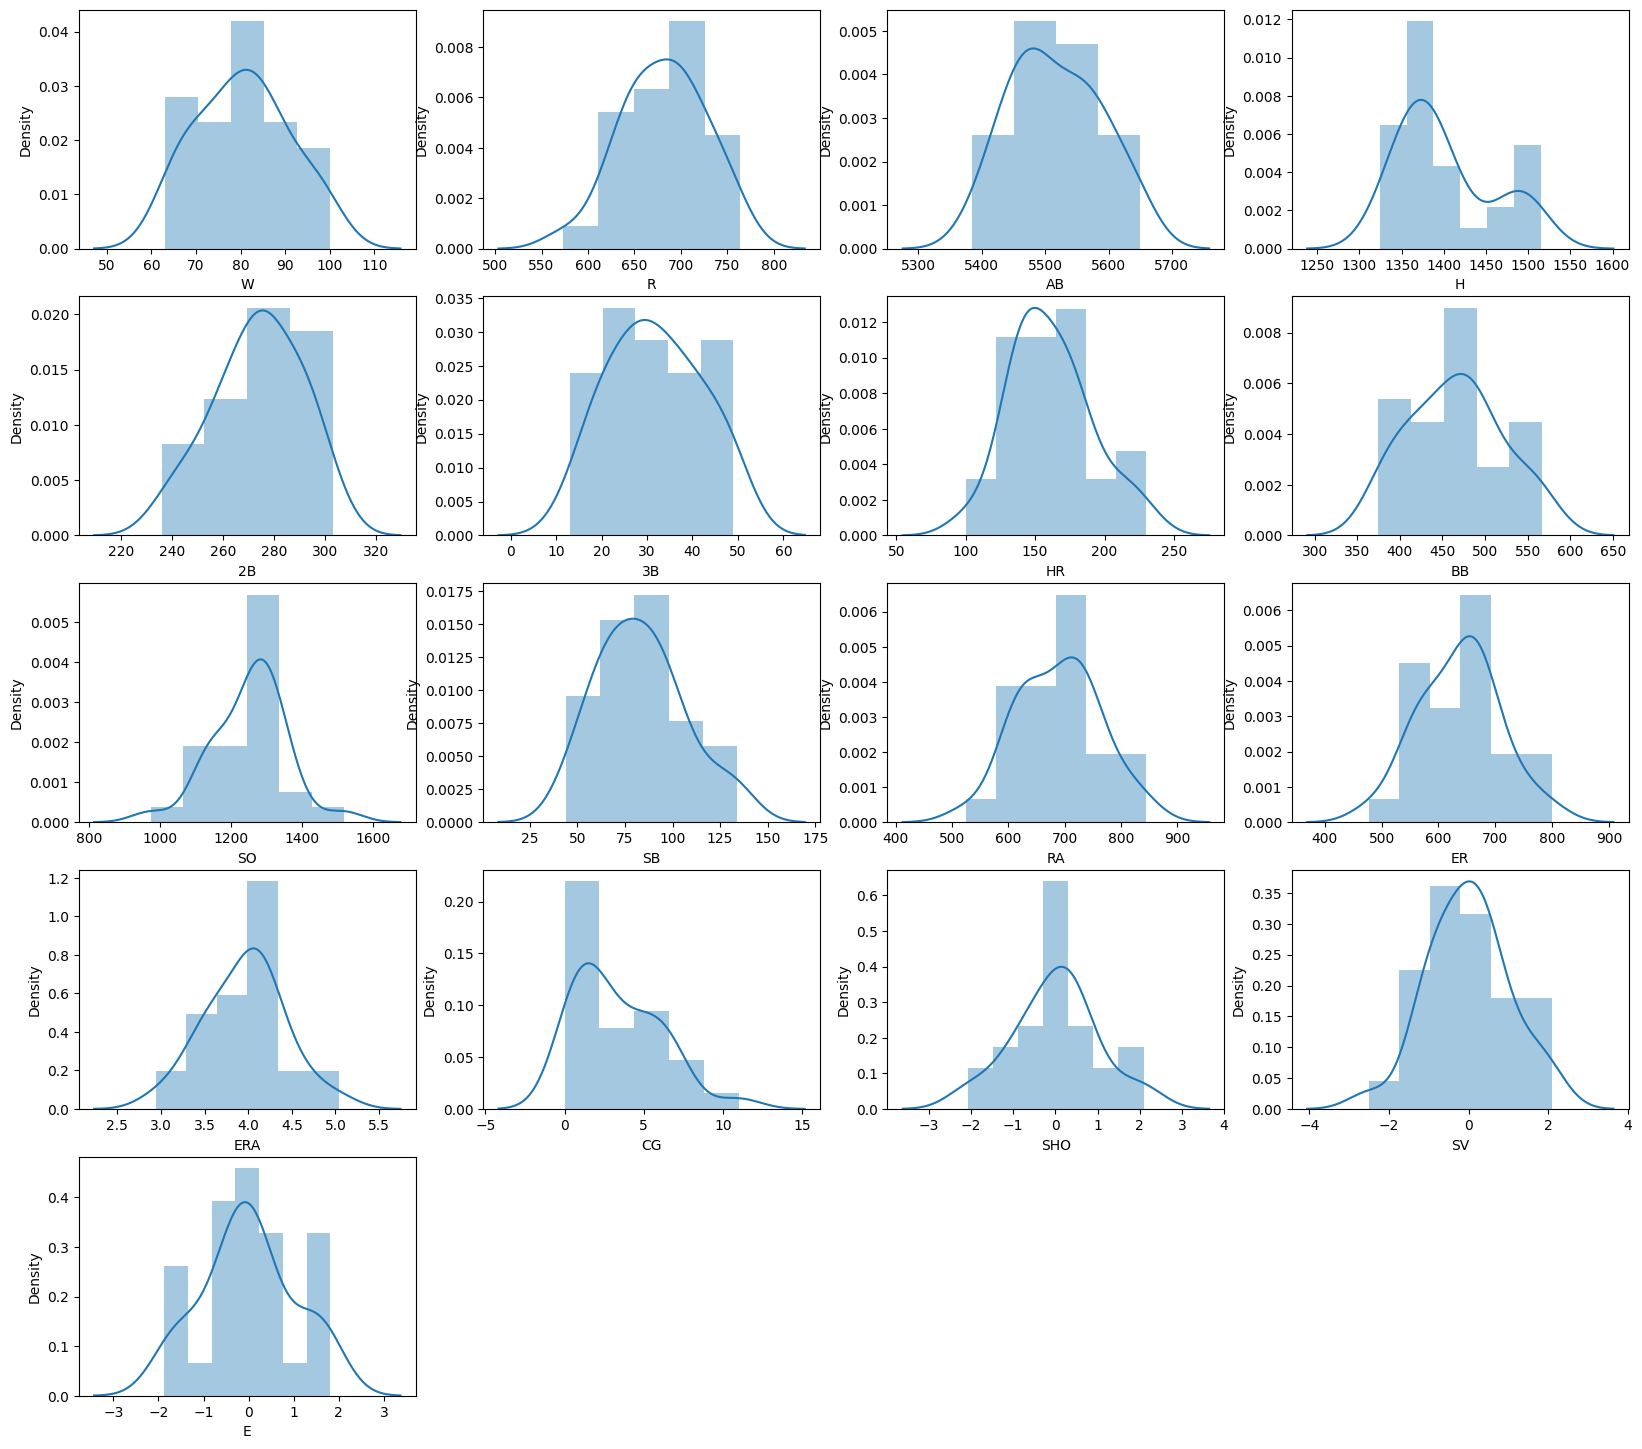

In [32]:
# visualization after removing skewness
plt.figure(figsize=(20,18))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5,4,i)
    sns.distplot(df[column])

# Data preprocessing

### seperating column into x and y

In [33]:
x=df.drop("W", axis=1)
y= df["W"]

In [34]:
x.shape

(29, 16)

In [35]:
y.shape

(29,)

#### Scaling data using MinMax Scaler 

In [36]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [37]:
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)


In [38]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["xm"] = x.columns

# Let's check the values
vif

,VIF values,xm
0,48.133475,R
1,57.919465,AB
2,27.875862,H
3,21.203991,2B
4,14.295223,3B
5,43.545087,HR
6,12.087032,BB
7,22.980018,SO
8,6.461084,SB
9,1019.044476,RA


The VIF value is more than 10 in the columns "AB", "RA", "ER", "ERA". Let's drop these one by one. First drop the colummn having highest VIF value that is "ER".
Column H and CG are independent with W so we also drop them



In [39]:
x.drop("H", axis=1, inplace=True)

In [40]:
x.drop("CG", axis=1, inplace=True)

In [41]:
x.drop("ER", axis=1, inplace=True)

In [42]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,30.022861,R
1,13.948994,AB
2,14.692936,2B
3,13.694272,3B
4,26.316470,HR
5,9.832311,BB
6,22.459966,SO
7,6.180089,SB
8,736.465515,RA
9,676.717288,ERA


In [43]:
x.drop("RA", axis=1, inplace=True)

In [44]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,29.318808,R
1,9.885604,AB
2,14.691234,2B
3,13.492393,3B
4,24.366291,HR
5,8.510071,BB
6,17.231445,SO
7,5.800269,SB
8,8.221403,ERA
9,8.497209,SHO


Multicolliarity was removed completely

# modelling

## Linear regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [46]:
lr=LinearRegression()

In [47]:
best_random_state = None
best_testing_accuracy = 0

for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train, y_train)
    pred_test = lr.predict(x_test)
    testing_accuracy = r2_score(y_test, pred_test)
    
    if testing_accuracy > best_testing_accuracy:
        best_testing_accuracy = testing_accuracy
        best_random_state = i

print("Best random state:", best_random_state)
print("Best testing accuracy:", best_testing_accuracy)

Best random state: 69
Best testing accuracy: 0.9653384847382068


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

In [49]:
#train the model
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
# prediction
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('R2_score:',r2_score(y_test,pred_test))


print("Errors")
# Mean Absolute Error (MAE)
print('MAE:',mean_absolute_error(y_test, pred_test))

# Mean Squared Error (MSE)
print('MSE:',mean_squared_error(y_test, pred_test))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred_test)))

R2_score: 0.9653384847382068
Errors
MAE: 1.8612386914091583
MSE: 5.427415598075775
RMSE: 2.329681437037213


### cross validation for linear regression model

In [51]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

In [52]:
cv_scores = []
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")
    

At cross fold 2 the cv score is -4.268730213501335 and accuracy score for training is 0.8868100737372485 and accuracy for testing is 0.9653384847382068


At cross fold 3 the cv score is 0.37197869322430765 and accuracy score for training is 0.8868100737372485 and accuracy for testing is 0.9653384847382068


At cross fold 4 the cv score is 0.3709653633698603 and accuracy score for training is 0.8868100737372485 and accuracy for testing is 0.9653384847382068


At cross fold 5 the cv score is 0.3734441230489943 and accuracy score for training is 0.8868100737372485 and accuracy for testing is 0.9653384847382068


At cross fold 6 the cv score is 0.30240025093157313 and accuracy score for training is 0.8868100737372485 and accuracy for testing is 0.9653384847382068


At cross fold 7 the cv score is 0.19021418947297505 and accuracy score for training is 0.8868100737372485 and accuracy for testing is 0.9653384847382068


At cross fold 8 the cv score is 0.23194009444421526 and accuracy score fo

In [53]:
print(cross_val_score(lr,x,y,cv=4).mean())

0.3709653633698603


we choose cross fold value= 4 as it gives a high score

# Regularization

Lasso regressor

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn .linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

In [55]:
ls=Lasso()

In [56]:
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [57]:
ls=Lasso(alpha= 0.01, random_state= 0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
print("r2 score",lss*100)
cv_score=cross_val_score(ls,x,y,cv=4)
cv_mean=cv_score.mean()
print("cross val score",cv_mean*100)

r2 score 96.37609099710109
cross val score 48.41845603272225


RandomForestRegressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [76]:

parameters = {
    'criterion': ['mse', 'mae', 'friedman_mse', 'poisson', 'squared_error', 'absolute_error'],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}


In [77]:
rf=RandomForestRegressor(criterion= 'squared_error',max_depth=20,n_estimators=100,max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('r2_score = ',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=4)
rfc=rfscore.mean()
print('cross val score: ',rfc*100)

r2_score =  33.87760510910057
cross val score:  40.88886972208654


GradientBoostingRegressor

In [78]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=4).mean())

R2_Score: 0.3105477616024169
MAE: 7.882931341940906
MSE: 107.95672966242155
RMSE: 10.390222791760605
Cross_Validaton_Score 0.11636952013737673


In [79]:
# Checking R2 score for Gradient Descent Regressor
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',mean_absolute_error(y_test, predSGD))
print('MSE:',mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=4).mean())

R2_Score: 0.5337540122389559
MAE: 7.224508353377456
MSE: 73.00635091691683
RMSE: 8.544375396535246
Cross_Validaton_Score 0.20864030414602197


Observation:
    Lasso regressor has higher accuracy than other so we select lasso regressor for regularization

# Hyperparameter tuning

In [80]:
# Lasso Regressor
parameters = {'alpha':[0.01, 0.1, 1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':[True,False]}

In [81]:
GCV=GridSearchCV(Lasso(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': [True, False],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [82]:
GCV.best_params_

{'alpha': 0.1,
 'fit_intercept': True,
 'max_iter': 6,
 'selection': 'random',
 'tol': 100}

In [83]:
# Creating final model
BaseBall = Lasso(alpha=0.1, fit_intercept=True, max_iter=2, selection="cyclic", tol=100)
BaseBall.fit(x_train, y_train)
pred = BaseBall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ls)*100)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred_ls)))

R2_Score: 96.37609099710109
RMSE value: 2.3821077880116728


Observation :
    After hyperparameter tuning, accuracy is 96.3760 for our best model

# Saving model

In [84]:
import pickle
filename='Base_ball_casestudy.pkl'
pickle.dump(rf,open(filename,'wb'))

# conclusion

In [85]:
loaded_model=pickle.load(open('Base_ball_casestudy.pkl','rb'))
loaded_model.fit(x_train,y_train)
result=loaded_model.score(x_test,y_test)

In [86]:
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
result=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
result

,original,predicted
0,71,71.399624
1,100,97.574645
2,92,90.460810
3,90,88.321745
4,68,67.462829
5,98,93.412163


# visualization

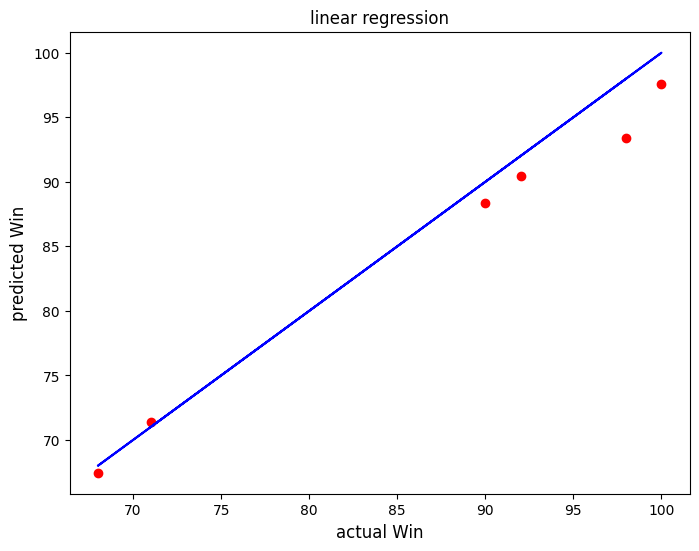

In [87]:
#visualization
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual Win',fontsize=12)
plt.ylabel('predicted Win',fontsize=12)
plt.title('linear regression')
plt.savefig('lr.png')
plt.show()